<a href="https://colab.research.google.com/github/Husain15/Pemrograman-Python/blob/main/Ta%20first%20try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!pip install -r /content/yolov5/requirements.txt

In [4]:
import torch
print('Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Using torch 1.11.0+cu113 CPU


In [5]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [6]:
import os
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [7]:

from roboflow import Roboflow
rf = Roboflow(api_key="72E5ChoU8h81oohtSx1h")
project = rf.workspace("2226346413-qq-com").project("moredrowsiness")
dataset = project.version(4).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/MoreDrowsiness-4 in yolov5pytorch:: 100%|██████████| 1390/1390 [00:00<00:00, 1592.42it/s]


In [8]:
%cat /content/datasets/MoreDrowsiness-4/data.yaml


names:
- Neutral
- Yawn
- closed eyes
nc: 3
train: /content/datasets/MoreDrowsiness-4/train/images
val: /content/datasets/MoreDrowsiness-4/valid/images


In [9]:
%cat /content/yolov5/models/yolov5n.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.25  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [10]:
%cat /content/yolov5/data/hyps/hyp.scratch-high.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
# Hyperparameters for high-augmentation COCO training from scratch
# python train.py --batch 32 --cfg yolov5m6.yaml --weights '' --data coco.yaml --img 1280 --epochs 300
# See tutorials for hyperparameter evolution https://github.com/ultralytics/yolov5#tutorials

lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.1  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 3.0  # warmup epochs (fractions ok)
warmup_momentum: 0.8  # warmup initial momentum
warmup_bias_lr: 0.1  # warmup initial bias lr
box: 0.05  # box loss gain
cls: 0.3  # cls loss gain
cls_pw: 1.0  # cls BCELoss positive_weight
obj: 0.7  # obj loss gain (scale with pixels)
obj_pw: 1.0  # obj BCELoss positive_weight
iou_t: 0.20  # IoU training threshold
anchor_t: 4.0  # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0  # foc

In [11]:
%cd /content/yolov5
!python train.py --img 416 --batch 64 --epochs 50 --data /content/datasets/MoreDrowsiness-4/data.yaml --weights yolov5s.pt --cache

/content/yolov5
train: weights=yolov5s.pt, cfg=, data=/content/datasets/MoreDrowsiness-4/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=64, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-178-g4870064 torch 1.11.0+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4

In [12]:
!pip install -U coremltools onnx scikit-learn==0.19.2

     |████████████████████████████████| 1.6 MB 15.6 MB/s 
     |████████████████████████████████| 12.8 MB 69.0 MB/s 
     |████████████████████████████████| 4.9 MB 58.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.19.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.19.2 which is incompatible.


In [13]:
!python export.py --weights /content/yolov5/best.pt   --data data/data.yaml

export: data=data/data.yaml, weights=['/content/yolov5/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v6.1-178-g4870064 torch 1.11.0+cu113 CPU

Traceback (most recent call last):
  File "export.py", line 601, in <module>
    main(opt)
  File "export.py", line 596, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "export.py", line 485, in run
    model = attempt_load(weights, map_location=device, inplace=True, fuse=True)  # load FP32 model
  File "/content/yolov5/models/experimental.py", line 96, in attempt_load
    ckpt = torch.load(attempt_download(w), map_location=map_location)  # 

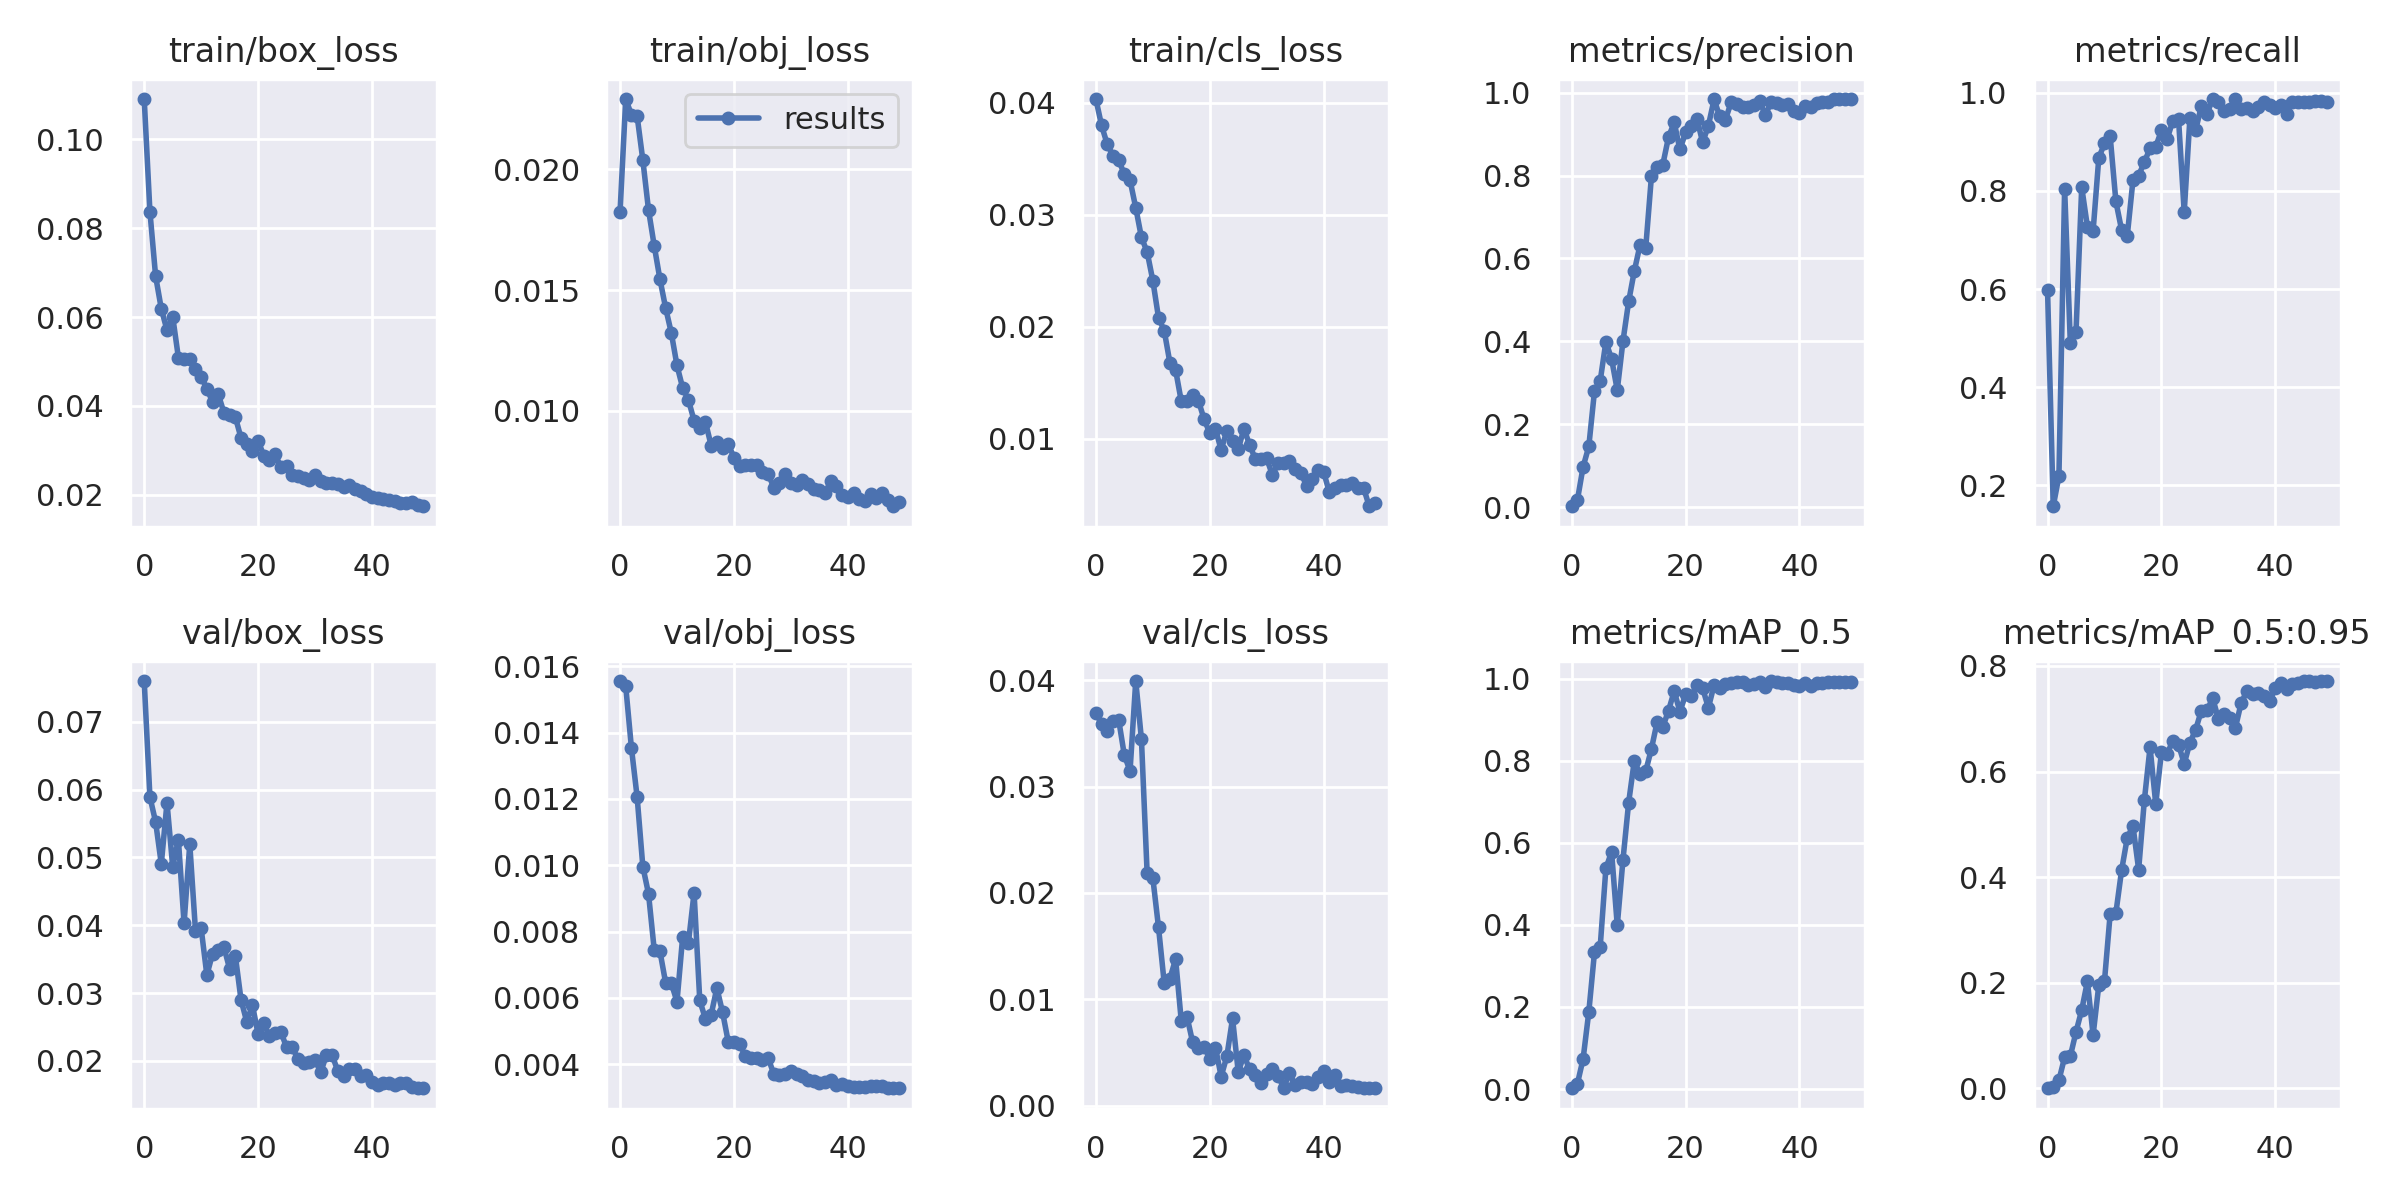

In [14]:
from IPython.display import Image
Image(filename='/content/yolov5/runs/train/exp/results.png')